# Práctica 2: Aprendizaje automático

__Fecha de entrega: 16 de mayo de 2021__

El objetivo de esta práctica es aplicar los distintos algoritmos de aprendizaje automático disponibles en la scikit-learn [sklearn](https://scikit-learn.org/stable/) sobre varios conjuntos de datos y aprender a interpretar los resultados obtenidos. La práctica consta de 3 notebooks que se entregarán simultáneamente en la tarea de entrega habilitada en el Campus  Virtual.

Lo más importante en esta práctica no es el código Python, sino el análisis de los datos y modelos que construyas y las explicaciones razonadas de cada una de las decisiones que tomes. __No se valorarán trozos de código o gráficas sin ningún tipo de contexto o explicación__.

Finalmente, recuerda establecer el parámetro `random_state` en todas las funciones que tomen decisiones aleatorias para que los resultados sean reproducibles (los resultados no varíen entre ejecuciones).

# Parte 2: Clasificación

__Número de grupo: 18__

__Nombres de los estudiantes: Hong Xiang Chen, Adrián Turiel Charro y Andrés Teruel Fernández__

Conjunto de datos relacionado con el diagnóstico de enfermedades cardiovasculares recopilado por el hospital _V.A. Medical Center, Long Beach and Cleveland Clinic Foundation (Robert Detrano, M.D., Ph.D.)_ y donado por David W. Aha a [UCI Machine Learning](https://archive.ics.uci.edu/ml/datasets/Heart+Disease/).

El objetivo es distinguir si los pacientes tienen una enfermedad cardiovascular. El atributo `target` contiene un valor que puede ser 0 (no enfermedad) o 1-4 indicando distintos tipos de enfermedades.

Cada uno de los pacientes se describe mediante los siguientes atributos:
- `age`: age in years
- `sex`: sex (1 = male; 0 = female)
- `cp`: chest pain type (1: typical angina; 2: atypical angina; 3: non-anginal pain; 4: asymptomatic)
- `trestbps`: resting blood pressure (in mm Hg on admission to the hospital)
- `chol`: serum cholestoral in mg/dl
- `fbs`: fasting blood sugar > 120 mg/dl (1 = true; 0 = false)
- `restecg`: resting electrocardiographic results (0: normal; 1:  ST-T wave abnormality; 2: probable or definite left ventricular hypertrophy)
- `thalach`: maximum heart rate achieved
- `exang`: exercise induced angina (1 = yes; 0 = no)
- `oldpeak`: ST depression induced by exercise relative to rest
- `slope`: the slope of the peak exercise ST segment (1: upsloping; 2: flat; 3: downsloping)
- `ca`: number of major vessels (0-3) colored by flourosopy
- `thal`: 3 = normal; 6 = fixed defect; 7 = reversable defect

Puede faltar datos en el conjunto de datos.

In [1]:
#Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.utils.multiclass import unique_labels
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict
from sklearn.tree import DecisionTreeClassifier, export_graphviz

In [2]:
RANDOM_STATE=333

## 1) Carga del conjunto de datos

Carga el conjunto de datos en un dataframe a partir del fichero `cleveland.csv`. 

Como todas las variables están codificadas como números, debemos indicar cuales son categóricas. Podemos hacerlo en cada columna de la siguiente forma:
```python
df['sex'] = df['sex'].astype('category')
```

En este problema sólo nos interesa saber si los pacientes están enfermos o no así que modifica esa columna del dataframe para que sólo tenga dos valores de tipo cadena: 'normal' y 'enfermo'.

Elimina los pacientes que tengan datos incompletos.

In [3]:
df = pd.read_csv('cleveland.csv') # Cargamos el conjuntos de datos
df = df.dropna()                  # eliminamos los pacientes con datos incompletos
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3


In [4]:
# Indicamos las variables categoricas
df['sex'] = df['sex'].astype('category')
df['cp'] = df['cp'].astype('category')
df['fbs'] = df['fbs'].astype('category')
df['restecg'] = df['restecg'].astype('category')
df['exang'] = df['exang'].astype('category')
df['slope'] = df['slope'].astype('category')
df['ca'] = df['ca'].astype('category')
df['thal'] = df['thal'].astype('category')

In [5]:
# Añadimos una columna "Type" donde inicialmente todos sus valores serán "Normal"
df['Type'] = 'Normal'
# Consultando la columna target, en aquellas filas donde tengan un valor superior a 0,
# modificaremos su valor de la columna "Type" a "Enfermo"
df.loc[df['target'] > 0, 'Type'] = 'Enfermo'
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,1,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3,Enfermo


In [6]:
# ya podemos eliminar la columna target
df = df.drop(['target'], axis=1)
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Type
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,Normal
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,Enfermo
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,Enfermo
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,Normal
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,4.0,140.0,241.0,0.0,0.0,123.0,1.0,0.2,2.0,0.0,7.0,Enfermo
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,Enfermo
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,Enfermo
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,Enfermo


## 2) Análisis de los datos

Comprueba si las clases a predecir están equilibradas y explica si debemos tenerlo en cuenta de algún modo.

Comprueba los rangos y distribuciones de las variables numéricas.

Estudia las relaciones 2 a 2 de las variables numéricas. Dibuja el diagrama de dispersión y calcula los coeficientes de correlación de Pearson. ¿Hay pares variables que separen bien las clases? ¿Hay correlaciones claras entre las variables? 

¿Crees que va a ser un problema sencillo o complicado de resolver?

In [7]:
df['Type'].value_counts()

Normal     160
Enfermo    137
Name: Type, dtype: int64

In [8]:
df['Type'].value_counts() / df['Type'].count() * 100

Normal     53.872054
Enfermo    46.127946
Name: Type, dtype: float64

* Comentarios: Podemos comprobar como hay un número parecido de datos de pacientes tanto enfermos como sanos (las clases a predecir), un 54% de los datos pertenecen a pacientes sanos y un 46 a pacientes enfermos. 

    Si las clases estuvieran desequilibradas deberíamos tenerlo en cuenta al medir el rendimiento de nuestro sistema ya que por ejemplo la medida de la tasa de aciertos (accuracy) no sirve de mucho. En nuestro caso están equilibradas por lo que no hay problema.

In [9]:
df.describe()

,age,trestbps,chol,thalach,oldpeak
count,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556
std,9.049736,17.762806,51.997583,22.941562,1.166123
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000
75%,61.000000,140.000000,276.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


* Comentarios: Mediante los datos de la columna 'age' podemos deducir que trabajamos con personas adultas y de tercera edad (de 29 a 77 años).

    Del resto de valores, no podemos comentar demasiado por nuestra falta de conocimiento en el campo, pero más abajo vemos como los datos siguen distribuciones normales y suponemos que tendrán mínimos y máximos algo extremos con la mayoría de valores que son más normales.

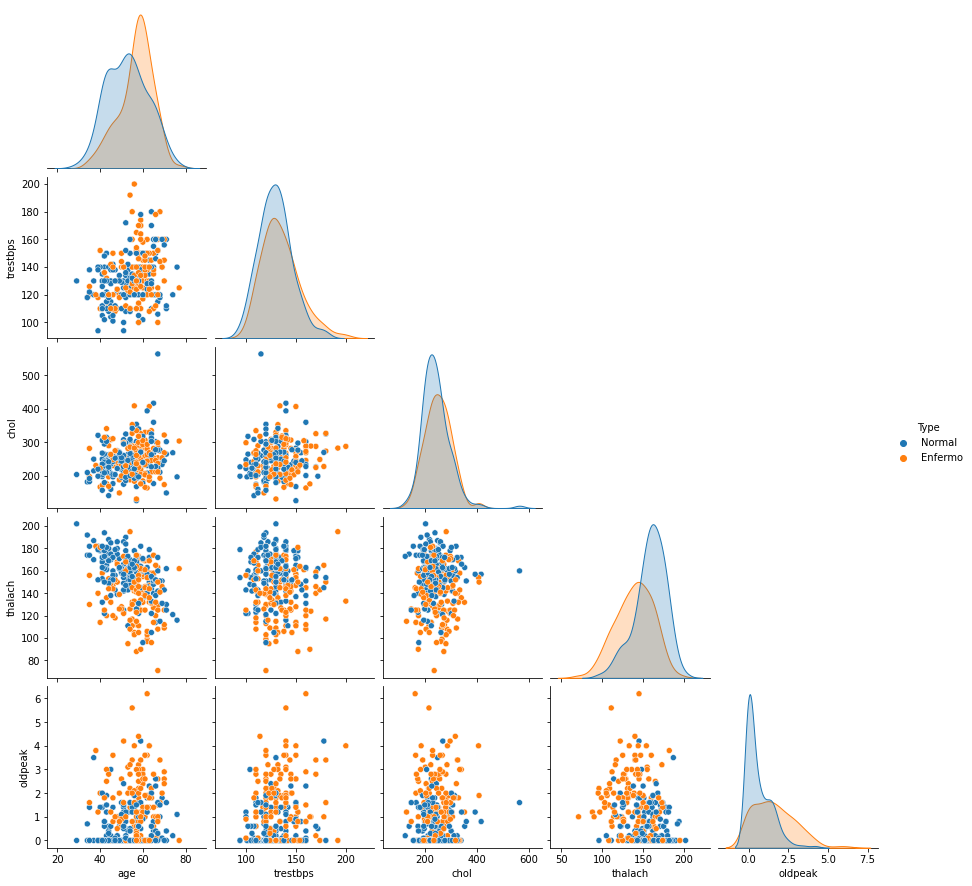

In [10]:
# diagrama de dispersión en función de cada par de variables
sns.pairplot(df, diag_kind='kde', hue='Type', corner = True)

* Comentarios: Ningún par de variables separa perfectamente las clases pero si es verdad que pueden reconocerse patrones. Por ejemplo con la variable 'thalach' y la variable 'age' se puede ver una notable separación entre el grupo de los enfermos y de las personas sanas, pero aún así sigue habiendo muchos pacientes dispersos.

In [11]:
# coeficientes de correlación entre pares de variables
# Valor cercano a 1 indica correlación directa
# Valor cercano a -1 indica correlación inversa
# Valor cercano a 0 indica no correlación
df.corr(method='pearson')

,age,trestbps,chol,thalach,oldpeak
age,1.000000,0.290476,0.202644,-0.394563,0.197123
trestbps,0.290476,1.000000,0.131536,-0.049108,0.191243
chol,0.202644,0.131536,1.000000,-0.000075,0.038596
thalach,-0.394563,-0.049108,-0.000075,1.000000,-0.347640
oldpeak,0.197123,0.191243,0.038596,-0.347640,1.000000


* Comentarios: Según el coeficiente de correlación de Pearson y los diagramas de dispersión, podemos observar que no existe ninguna relación visible entre cada par de variables. Se supone que para que pueda afirmarse que existe una relación entre dos variables, el coeficiente de correlación de Pearson tiene que ser > 0.7 o < -0.7 (más o menos) y ningún par de variables se acerca a esos valores.
    
    Mediante los datos obtenidos creemos que el problema va a ser algo difícil de resolver (ya que ningún par de variables separa bien ambos grupos de pacientes) pero puede que teniendo en cuenta más variables a la vez (en vez de 2) el problema se resuelva de manera más sencilla.

## 3) Normalizar los datos

Decide razonadamente si es necesario escalar o estandarizar los datos teniendo en cuenta que vamos a construir un árbol de decisión.

* Comentarios: Hemos visto que un árbol de decisión se construye de forma voraz empezando por la raíz hasta las hojas y en cada nodo escogemos el atributo que más discrimine entre el conjunto de datos. La cantidad de discriminación la medíamos gracias a la entropía (nivel de desorden) y para calcularla solo necesitamos saber las probabilidades de que un nodo tenga las diferentes clases. En ningún momento necesitamos relacionar variables entre sí (ni medir distancias entre ellas como en clustering) por lo que no es necesario escalar ni estandarizar los datos.

## 4) Profundidad óptima del árbol

Elige razonadamente la profundidad óptima del árbol de decisión usando validación cruzada en 10 partes. Los árboles que vas a entrenar deben utilizar la entropía como criterio de selección de variables.

Como sklearn trabaja con arrays, deberás acceder al array interno del dataframe. Crea un array que contenga sólo los datos de entrenamiento (sin la variable `target`) y otro array que sólo contenga la variable de salida.

__Nota__: parece que la clase DecisionTreeClassifier no es capaz de trabajar con variables categóricas y usa sus correspondientes valores numéricos. Eso no es una buena idea porque establece una distancia entre las categorías que no tiene por qué tener sentido. Se podrían recodificar las variables categóricas usando un [OneHotEnconder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html) pero en esta práctica no es necesario hacerlo.

In [12]:
# array que contiene sólo los datos de entrenamiento
dataX = df.copy()
dataX = dataX.drop(['Type'], axis=1)
#print(dataX)
# array que contiene sólo las variables de salida
dataY = pd.DataFrame()
dataY['Type'] = df['Type'].copy()
#print(dataY)

# Partimos el conjunto de datos en entrenamiento (70%) y test (30%)
X_train, X_test, y_train, y_test = train_test_split(dataX, dataY, test_size=0.3, random_state=RANDOM_STATE)

In [13]:
train_accuracy = []
test_accuracy = []

# Entrenamos y validamos varios árboles con distintas profundidades máximas
max_depths = range(1, 13)
for md in max_depths: 
    clf = DecisionTreeClassifier(criterion="entropy",       # usamos entropía como criterio de selección
                                 max_depth=md,              # profundidad máxima del árbol
                                 min_samples_split=2,       # mínimo de muestras en el nodo para seguir dividiéndolo
                                 random_state=RANDOM_STATE)  
    
    scores = cross_validate(clf, dataX, dataY, scoring='accuracy', cv=10, return_train_score=True)

    train_accuracy.append(np.mean(scores['train_score']))
    test_accuracy.append(np.mean(scores['test_score']))

train_accuracy, test_accuracy

([0.764682206942814,
  0.7706691262787189,
  0.8518516965733133,
  0.8720484655374812,
  0.9147059645592265,
  0.9495066800827324,
  0.9712085639219632,
  0.9843032030856952,
  0.9940172731846386,
  0.9981329308513613,
  0.9996268656716417,
  1.0],
 [0.7404597701149426,
  0.7104597701149425,
  0.7906896551724139,
  0.7641379310344828,
  0.763793103448276,
  0.754367816091954,
  0.7677011494252873,
  0.7574712643678161,
  0.7573563218390804,
  0.747241379310345,
  0.747241379310345,
  0.747241379310345])

* Comentario: al limitar la profundidad máxima del árbol de decisión podemos obtener un clasificador menos "ajustado" a los datos de entrenamiento y, por tanto, que generalice mejor en datos nuevos. Por eso empleamos validación cruzada para calcular la profundidad óptima probando para diferentes valores de ese parámetro. Y como podemos observar, a mayor profundidad clasifica mejor los datos de entrenamiento, pero para los casos de prueba el mejor valor se obtiene en profundidad 3 con un valor de 79% , y a partir de ahí disminuye poco a poco hasta alcanzar el valor de 74%, donde se mantendrá estable pese a seguir aumentando la profundidad.
   
   Al tener 13 variables, como máximo el árbol podrá tener altura 13. Probaremos con alturas de 1 a 13 para ver cuál de ellas funciona mejor sin que sobreaprenda.

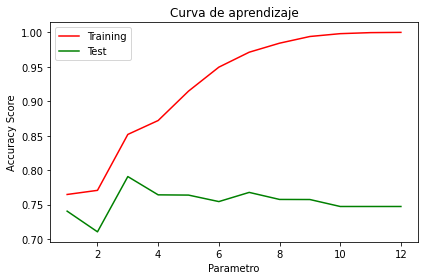

In [14]:
#Representación más gáfica

# Draw lines
plt.plot(max_depths, train_accuracy, color="r",  label="Training")
plt.plot(max_depths, test_accuracy, color="g", label="Test")

# Create plot
plt.title("Curva de aprendizaje")
plt.xlabel("Parametro"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

* Comentario: tras aplicar la validación cruzada en 10 partes, acabamos obteniendo la gráfica anterior, en la cual se aprecia que para los ejemplos de prueba, la mejor profundidad obtenida es 3. A partir de esa profundidad la métrica mejora para el conjunto de entrenamiento y empeora para el conjunto de test indicando que el clasificador está sobre-entrenado y generaliza peor.

## 5) Analizando el árbol de decisión

Crea un nuevo árbol de decisión con la profundidad óptima y dibújalo. Analiza:

In [15]:
# Creamos un árbol de decisión y lo entrenamos
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3,min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(dataX, dataY)

df_variables = list(dataX.columns) 
print("Nombre de las variables: \n",df_variables, "\n")

df_targets = np.array(["Enfermo", "Normal"])
print("Nombre de lobjetivos finales: ",df_targets)

Nombre de las variables: 
 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'] 

Nombre de lobjetivos finales:  ['Enfermo' 'Normal']


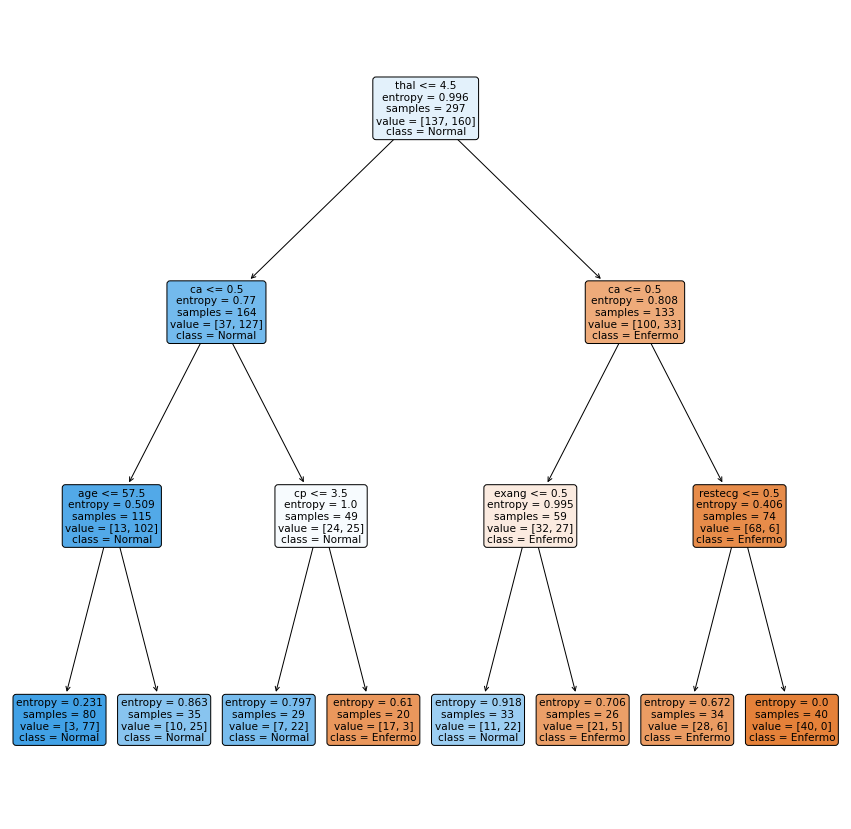

In [16]:
# Pintamos el árbol
plt.figure(figsize=(15,15))
plot_tree(clf, filled=True, feature_names=df_variables, class_names=df_targets, rounded=True)
plt.show()

- ¿Cuáles son las variables más importantes y en qué orden?

El algoritmo con el que construimos el árbol es un modelo fácilmente interpretable, que sitúa en los primeros niveles a las variables que mejor separan las clases con las que trabajamos. En nuestro caso, destaca "thal" y a continuación "ca".  

- ¿Hay variables del conjunto de datos que no se han usado?

Para la altura que hemos seleccionado (la óptima), sólo emplea 6 de las 13 variables, aquellas que mejor separan las clases: thai, ca, age, cp, exang y restecg.

- ¿Cuál sería la tasa de aciertos (_accuracy_) del árbol sobre el conjunto de entrenamiento si sólo hiciera una pregunta? 

Para una pregunta, equivaldría a una profundidad de 1 y por tanto obtendríamos una accuracy del 77%, como mostramos a continuación.

In [17]:
# Creamos y entrenamos el árbol de decisión con los parámetros por defecto
clf = DecisionTreeClassifier(criterion="entropy", max_depth=1,min_samples_split=2, random_state=RANDOM_STATE)
clf = clf.fit(X_train, y_train)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_train, y_train)
print(train_accuracy, "%")

0.7729468599033816 %


- ¿El árbol que hemos construido es capaz de separar las clases? 

El árbol generaliza bien, pero solo tiene una única hoja pura, con entropía 0, para el resto, el clasificador elegirá la clase mayoritaria (del campo value) para hacer la predicción.

- ¿En cuál de los nodos hoja existe mayor confusión?

Para ver el nivel de la confusión, necesitamos ver la entropía de cada uno de sus nodos hojas, cuanto mayor sea el valor de la entropía, mayor confusión tendrá. Por lo tanto, nuestra hoja nodo 5 con valor de entropía 0.918 tendrá la mayor confusión. Y nuestro último nodo con entropía 0.0 tiene orden total.

## 6) Estudiando el error

Calcula la precisión, exhaustividad y valor F1 agregadas usando la profundidad óptima del árbol y validación cruzada en 10 partes. ¿Qué podemos decir sobre el funcionamiento general de nuestro clasificador?

Calcula el informe detallado para cada una de las clases y dibuja la matriz de confusión. ¿Cómo se comporta nuestro clasificador en cada una de las clases?

Finalmente, ¿cómo de fiable te parece? ¿crees que aportaría algo en un hospital real? Analiza las ventajas y desventajas de utilizar un clasificador basado en árboles de decisión en el contexto de este problema.

In [18]:
# Importamos las métricas que vamos a evaluar para cada una de las clases
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# Escribimos las métricas que queremos evaluar
scoring_metrics = ['precision_weighted', 'recall_weighted','f1_weighted']

# Construimos el clasificador
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3, min_samples_split=2, random_state=RANDOM_STATE)

# Calculamos las métricas utilizando validación cruzada
scores = cross_validate(clf, dataX, dataY, scoring=scoring_metrics, 
                        cv=10, return_train_score=False)

# Mostrar las métricas agregadas
print('Precisión ponderada media: ',np.mean(scores['test_precision_weighted']))
print('Exhaustividad ponderada media: ',np.mean(scores['test_recall_weighted']))
print('F1 ponderado media: ',np.mean(scores['test_f1_weighted']))

Precisión ponderada media:  0.8105482743239228
Exhaustividad ponderada media:  0.7906896551724139
F1 ponderado media:  0.7803052323807546


* Comentario: 

    La precisión agregada nos indica de todos los pacientes que hemos diagnosticado, que porcentaje de ellos hemos diagnosticado de forma correcta. Tenemos una precisión agregada del 81% indicando que un 19% de los diagnósticos serán erróneos. El hecho de que diagnosticamos casi un 20% de los pacientes mal nos indica que nuestro clasificador debería mejorar bastante si queremos usarlo en la vida real.

    F1 al ser la media armónica de la exhaustividad y de la precisión, si alguna de las dos medidas es baja, el valor de f1 también lo será, por lo que nos da una idea bastante buena de la calidad de nuestro predictor. La dificultad de crear árboles de decisión se encuentra en conseguir una precisión alta junto con una exhaustividad alta (conseguir que la exhaustividad sea alta es muy fácil haciendo que el predictor devuelva siempre que un paciente siempre está enfermo pero esto hace que la precisión tenga un valor muy bajo). 

    La precisión y la exhaustividad agregadas en este caso tienen valores altos y cercanos (80% mas menos) por lo que f1 también nos dará un valor alto y podemos decir que nuestro predictor funciona de forma parecida para ambas clases.

* Como las clases están equilibradas (había un 54% de enfermos y un 46% de personas sanas), la tasa de aciertos (accuracy) puede ser una buena medida para estimar cómo se comporta nuestro árbol de decisión:

In [23]:
# Tasa de aciertos sobre el conjunto de validación
clf = clf.fit( dataX, dataY)

# Calculamos la precisión del modelo de entrenamiento y de test
train_accuracy = clf.score(X_test, y_test)
print(train_accuracy, "%")

0.8111111111111111 %


* Comentarios: la accuracy nos indica qué porcentaje de pacientes hemos diagnosticado de forma correcta. Una tasa de aciertos de un 81% sobre todo el conjunto de datos nos refuerza los comentarios previamente hechos sobre el calificador.  

In [20]:
# Esta función entrena 10 clasificadores usando validación cruzada y devuelve una predicción
# para cada punto usando el clasificador que no fue entrenado con ese punto
predictions = cross_val_predict(clf, dataX, dataY, cv=10)

# Informe por clases
cr = classification_report(dataY,predictions, target_names=df_targets)
print(cr)

              precision    recall  f1-score   support

     Enfermo       0.82      0.71      0.76       137
      Normal       0.78      0.86      0.82       160

    accuracy                           0.79       297
   macro avg       0.80      0.79      0.79       297
weighted avg       0.79      0.79      0.79       297



In [21]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    # classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Confusion matrix, without normalization
[[27  6]
 [ 3 54]]


<AxesSubplot:title={'center':'Confusion matrix, without normalization'}, xlabel='Predicted label', ylabel='True label'>

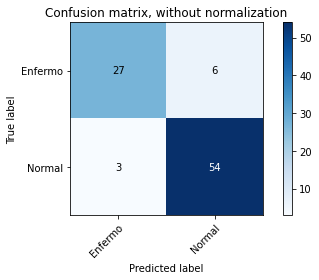

In [22]:
clf= clf.fit(X_test,y_test)
pre = clf.predict(X_test)
pre = pre =='Normal'
#print(pre)

d = y_test['Type'] == 'Normal'
d = d.to_numpy()
#print(d)

plot_confusion_matrix(d, pre, df_targets, normalize=False)

* Comentario: La precisión nos indica el porcentaje de verdaderos positivos dentro de todos los pacientes que nuestro sistema ha declarado como verdaderos, tenemos una precisión para enfermos del 82% indicando que un 18% de los diagnósticos serán falsos positivos. Si los tratamientos o medicinas recetadas a las personas enfermas son peligrosas o tienen efectos secundarios graves, deberíamos centrarnos en aumentar la precisión ya que no podemos permitirnos poner en peligro la salud de un 19% de los pacientes que no tienen ningún problema.

    La exhaustividad es una medida que nos indica el porcentaje de todos los positivos, cuántos de ellos hemos podido encontrar. La exhaustividad de la clase enfermos de nuestro árbol de decisión nos dá un 71% indicando que un 29% de los pacientes con una enfermedad cardiovascular serán falsos negativos. Teniendo en cuenta la gravedad de las enfermedades con las que estamos tratando (según la OMS las enfermedades cardiovasculares son las responsables de un 30% de las defunciones registradas en el mundo), creemos que la exhaustividad debería ser mucho más alta.

    Nuestro árbol se comporta mejor clasificando personas sanas ya que tiene un F1 más alto que para los enfermos. 

    La exhaustividad para las personas normales es significativamente más alta que para las personas enfermas, indicando que el árbol de decisión diagnostica mal a más personas enfermas que personas sanas. Esto es lo contrario de lo que queremos ya que, como hemos comentado antes, estamos tratando con enfermedades peligrosas, es importante tener una exhaustividad para las personas enfermas más alta de la actual. 

    La precisión de las personas enfermas es mejor que la precisión de las personas sanas aunque en este caso los valores son muy parecidos.

* Comentario: Es cierto que sería ideal tener una precisión y una exhaustividad mucho más altas ya que estamos tratando con un clasificador de personas con enfermedades cardiovasculares pero creemos que tiene unas estadísticas suficientemente buenas para usarse como primera opinión en un escenario real para luego los médicos terminar de hacer el diagnóstico.

    En ningún caso este sistema debe usarse para diagnosticar enfermedades sin un experto que revise su decisión ya que podríamos llegar a matar o a empeorar mucho la salud de un 20% de los pacientes.

    Una ventaja que tienen los árboles de decisiones es que son inteligibles por los expertos, en este caso los médicos pueden ver perfectamente qué camino ha seguido un paciente desde la raíz hasta ser clasificado. También puede verse qué variables discriminan más y en qué clases influyen más.

    Además podemos incluir en el conjunto de pacientes todas las variables que queramos (aunque no tengamos claro si influyen en el problema) ya que el algoritmo solo escoge las variables más relevantes para la clasificación.
    
    Como desventajas podríamos encontrar la pérdida de información debido al categorizar variables continuas, o que la variación de los datos pueda modificar ampliamente la estructura del árbol.